In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [23]:
fashion_mnist=keras.datasets.fashion_mnist

In [24]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [26]:
train_images.shape[0]

60000

In [27]:
train_images=train_images/255.0 # to bring gray scale between 0 to 1
test_images=test_images/255.0

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

9


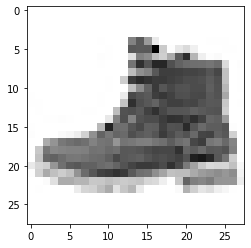

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 18121 # You may select anything up to 60,000
print(train_labels[image_index]) # The label is 8
plt.imshow(train_images[image_index], cmap='Greys')

In [31]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [32]:
train_images.shape

(60000, 28, 28, 1)

In [63]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [64]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [65]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

INFO:tensorflow:Reloading Oracle from existing project output\Mnist Fashion\oracle.json
INFO:tensorflow:Reloading Tuner from output\Mnist Fashion\tuner0.json


In [66]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.3169 - accuracy: 0.09 - ETA: 2:06 - loss: 4.2632 - accuracy: 0.15 - ETA: 2:45 - loss: 4.4348 - accuracy: 0.15 - ETA: 3:08 - loss: 3.8842 - accuracy: 0.17 - ETA: 3:19 - loss: 3.5204 - accuracy: 0.22 - ETA: 3:24 - loss: 3.2587 - accuracy: 0.24 - ETA: 3:30 - loss: 2.9768 - accuracy: 0.29 - ETA: 3:34 - loss: 2.7982 - accuracy: 0.33 - ETA: 3:38 - loss: 2.6534 - accuracy: 0.35 - ETA: 3:41 - loss: 2.5162 - accuracy: 0.36 - ETA: 3:43 - loss: 2.4308 - accuracy: 0.36 - ETA: 3:44 - loss: 2.3173 - accuracy: 0.39 - ETA: 3:45 - loss: 2.2198 - accuracy: 0.41 - ETA: 3:46 - loss: 2.1237 - accuracy: 0.43 - ETA: 3:48 - loss: 2.0530 - accuracy: 0.44 - ETA: 3:49 - loss: 1.9958 - accuracy: 0.45 - ETA: 3:50 - loss: 1.9321 - accuracy: 0.47 - ETA: 3:50 - loss: 1.8669 - accuracy: 0.48 - ETA: 3:51 - loss: 1.8220 - accuracy: 0.49 - ETA: 3:51 - loss: 1.7857 - accuracy: 0.49 - ETA: 3:51 - loss: 1.7589 - accuracy: 0.50 - ETA: 3:51 - loss: 1.7186 - accura

 744/1688 [============>.................] - ETA: 2:50 - loss: 0.5685 - accuracy: 0.79 - ETA: 2:50 - loss: 0.5677 - accuracy: 0.79 - ETA: 2:50 - loss: 0.5681 - accuracy: 0.79 - ETA: 2:50 - loss: 0.5682 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5679 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5679 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5680 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5679 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5677 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5677 - accuracy: 0.79 - ETA: 2:49 - loss: 0.5676 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5674 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5671 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5668 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5664 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5660 - accuracy: 0.79 - ETA: 2:48 - loss: 0.5660 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5657 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5651 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5647 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5646 - accuracy: 0.80 - ETA: 2:47 - loss: 0.5648 - accu

 930/1688 [===============>..............] - ETA: 2:21 - loss: 0.5360 - accuracy: 0.80 - ETA: 2:21 - loss: 0.5358 - accuracy: 0.80 - ETA: 2:21 - loss: 0.5357 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5355 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5352 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5349 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5346 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5348 - accuracy: 0.80 - ETA: 2:20 - loss: 0.5345 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5348 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5351 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5349 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5344 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5338 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5338 - accuracy: 0.80 - ETA: 2:19 - loss: 0.5336 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5332 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5328 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5329 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5329 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5329 - accuracy: 0.80 - ETA: 2:18 - loss: 0.5327 - accu

1116/1688 [==================>...........] - ETA: 1:52 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:52 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:52 - loss: 0.5118 - accuracy: 0.81 - ETA: 1:52 - loss: 0.5115 - accuracy: 0.81 - ETA: 1:52 - loss: 0.5114 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5117 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5114 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5114 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5113 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5112 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5110 - accuracy: 0.81 - ETA: 1:51 - loss: 0.5110 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5108 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5105 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5105 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5103 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5104 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5104 - accuracy: 0.81 - ETA: 1:50 - loss: 0.5102 - accuracy: 0.81 - ETA: 1:49 - loss: 0.5099 - accuracy: 0.81 - ETA: 1:49 - loss: 0.5096 - accuracy: 0.81 - ETA: 1:49 - loss: 0.5095 - accu

1302/1688 [======================>.......] - ETA: 1:24 - loss: 0.4941 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4937 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4934 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4933 - accuracy: 0.82 - ETA: 1:24 - loss: 0.4932 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4930 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4928 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4925 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4925 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4922 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4922 - accuracy: 0.82 - ETA: 1:23 - loss: 0.4919 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4916 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4920 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4917 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4914 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4913 - accuracy: 0.82 - ETA: 1:22 - loss: 0.4913 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4909 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4908 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4908 - accuracy: 0.82 - ETA: 1:21 - loss: 0.4909 - accu

1488/1688 [=========================>....] - ETA: 56s - loss: 0.4800 - accuracy: 0.827 - ETA: 56s - loss: 0.4799 - accuracy: 0.827 - ETA: 56s - loss: 0.4799 - accuracy: 0.827 - ETA: 56s - loss: 0.4799 - accuracy: 0.827 - ETA: 56s - loss: 0.4800 - accuracy: 0.827 - ETA: 56s - loss: 0.4800 - accuracy: 0.827 - ETA: 55s - loss: 0.4799 - accuracy: 0.827 - ETA: 55s - loss: 0.4799 - accuracy: 0.827 - ETA: 55s - loss: 0.4797 - accuracy: 0.827 - ETA: 55s - loss: 0.4796 - accuracy: 0.827 - ETA: 55s - loss: 0.4794 - accuracy: 0.827 - ETA: 55s - loss: 0.4795 - accuracy: 0.827 - ETA: 55s - loss: 0.4794 - accuracy: 0.827 - ETA: 54s - loss: 0.4793 - accuracy: 0.827 - ETA: 54s - loss: 0.4790 - accuracy: 0.827 - ETA: 54s - loss: 0.4789 - accuracy: 0.827 - ETA: 54s - loss: 0.4787 - accuracy: 0.827 - ETA: 54s - loss: 0.4786 - accuracy: 0.827 - ETA: 54s - loss: 0.4786 - accuracy: 0.827 - ETA: 54s - loss: 0.4784 - accuracy: 0.827 - ETA: 53s - loss: 0.4783 - accuracy: 0.827 - ETA: 53s - loss: 0.4780 - accur

1676/1688 [============================>.] - ETA: 29s - loss: 0.4685 - accuracy: 0.830 - ETA: 29s - loss: 0.4685 - accuracy: 0.830 - ETA: 29s - loss: 0.4683 - accuracy: 0.830 - ETA: 29s - loss: 0.4683 - accuracy: 0.830 - ETA: 29s - loss: 0.4682 - accuracy: 0.830 - ETA: 28s - loss: 0.4680 - accuracy: 0.830 - ETA: 28s - loss: 0.4678 - accuracy: 0.830 - ETA: 28s - loss: 0.4677 - accuracy: 0.830 - ETA: 28s - loss: 0.4676 - accuracy: 0.830 - ETA: 28s - loss: 0.4675 - accuracy: 0.830 - ETA: 28s - loss: 0.4673 - accuracy: 0.830 - ETA: 27s - loss: 0.4671 - accuracy: 0.830 - ETA: 27s - loss: 0.4672 - accuracy: 0.830 - ETA: 27s - loss: 0.4671 - accuracy: 0.830 - ETA: 27s - loss: 0.4671 - accuracy: 0.830 - ETA: 27s - loss: 0.4669 - accuracy: 0.831 - ETA: 27s - loss: 0.4670 - accuracy: 0.831 - ETA: 27s - loss: 0.4670 - accuracy: 0.831 - ETA: 26s - loss: 0.4668 - accuracy: 0.831 - ETA: 26s - loss: 0.4668 - accuracy: 0.831 - ETA: 26s - loss: 0.4667 - accuracy: 0.831 - ETA: 26s - loss: 0.4667 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.4596 - accuracy: 0.83 - ETA: 1s - loss: 0.4595 - accuracy: 0.83 - ETA: 1s - loss: 0.4595 - accuracy: 0.83 - ETA: 1s - loss: 0.4597 - accuracy: 0.83 - ETA: 1s - loss: 0.4597 - accuracy: 0.83 - ETA: 0s - loss: 0.4597 - accuracy: 0.83 - ETA: 0s - loss: 0.4596 - accuracy: 0.83 - ETA: 0s - loss: 0.4595 - accuracy: 0.83 - ETA: 0s - loss: 0.4594 - accuracy: 0.83 - ETA: 0s - loss: 0.4594 - accuracy: 0.83 - ETA: 0s - loss: 0.4592 - accuracy: 0.83 - ETA: 0s - loss: 0.4593 - accuracy: 0.83 - 256s 152ms/step - loss: 0.4593 - accuracy: 0.8341 - val_loss: 0.3769 - val_accuracy: 0.8622
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.90 - ETA: 2:18 - loss: 0.3313 - accuracy: 0.87 - ETA: 3:10 - loss: 0.3723 - accuracy: 0.86 - ETA: 3:41 - loss: 0.3555 - accuracy: 0.85 - ETA: 3:48 - loss: 0.3280 - accuracy: 0.86 - ETA: 3:58 - loss: 0.2960 - accuracy: 0.88 - ETA: 4:05 - loss: 0.2912 - accuracy: 0.87 - ETA: 4:11 - loss: 0.2918 - accuracy: 0.87 - ETA: 4:11 - loss: 0.3099 - accuracy: 0.86 - ETA: 4:09 - loss: 0.2903 - accuracy: 0.87 - ETA: 4:09 - loss: 0.3204 - accuracy: 0.86 - ETA: 4:14 - loss: 0.3331 - accuracy: 0.86 - ETA: 4:18 - loss: 0.3317 - accuracy: 0.87 - ETA: 4:17 - loss: 0.3307 - accuracy: 0.87 - ETA: 4:19 - loss: 0.3245 - accuracy: 0.87 - ETA: 4:19 - loss: 0.3560 - accuracy: 0.87 - ETA: 4:18 - loss: 0.3509 - accuracy: 0.87 - ETA: 4:17 - loss: 0.3524 - accuracy: 0.87 - ETA: 4:16 - loss: 0.3494 - accuracy: 0.87 - ETA: 4:15 - loss: 0.3604 - accuracy: 0.87 - ETA: 4:15 - loss: 0.3671 - accuracy: 0.87 - ETA: 4:15 - loss: 0.3576 - accura

 744/1688 [============>.................] - ETA: 2:50 - loss: 0.3479 - accuracy: 0.87 - ETA: 2:50 - loss: 0.3478 - accuracy: 0.87 - ETA: 2:50 - loss: 0.3482 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3483 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3481 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3479 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3480 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3481 - accuracy: 0.87 - ETA: 2:49 - loss: 0.3485 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3482 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3484 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3486 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3485 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3482 - accuracy: 0.87 - ETA: 2:48 - loss: 0.3485 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3485 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3490 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3488 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3486 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3488 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3486 - accuracy: 0.87 - ETA: 2:47 - loss: 0.3488 - accu

 930/1688 [===============>..............] - ETA: 2:21 - loss: 0.3512 - accuracy: 0.87 - ETA: 2:21 - loss: 0.3517 - accuracy: 0.87 - ETA: 2:21 - loss: 0.3519 - accuracy: 0.87 - ETA: 2:21 - loss: 0.3517 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3518 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3518 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3519 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3519 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3518 - accuracy: 0.87 - ETA: 2:20 - loss: 0.3518 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3521 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3524 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3524 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3524 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3523 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3522 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3520 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3517 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3516 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3516 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3518 - accuracy: 0.87 - ETA: 2:18 - loss: 0.3522 - accu

1116/1688 [==================>...........] - ETA: 1:53 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3548 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3550 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3548 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3547 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:52 - loss: 0.3548 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3547 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3544 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3543 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3544 - accuracy: 0.86 - ETA: 1:51 - loss: 0.3547 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3545 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3546 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3545 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3545 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3544 - accuracy: 0.86 - ETA: 1:50 - loss: 0.3544 - accu

1302/1688 [======================>.......] - ETA: 1:25 - loss: 0.3514 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3517 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3517 - accuracy: 0.86 - ETA: 1:24 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3515 - accuracy: 0.86 - ETA: 1:23 - loss: 0.3514 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3513 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3513 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3514 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3514 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:22 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:21 - loss: 0.3515 - accu

1488/1688 [=========================>....] - ETA: 57s - loss: 0.3531 - accuracy: 0.868 - ETA: 57s - loss: 0.3530 - accuracy: 0.868 - ETA: 57s - loss: 0.3530 - accuracy: 0.868 - ETA: 57s - loss: 0.3531 - accuracy: 0.868 - ETA: 56s - loss: 0.3531 - accuracy: 0.868 - ETA: 56s - loss: 0.3530 - accuracy: 0.868 - ETA: 56s - loss: 0.3531 - accuracy: 0.868 - ETA: 56s - loss: 0.3531 - accuracy: 0.868 - ETA: 56s - loss: 0.3530 - accuracy: 0.868 - ETA: 56s - loss: 0.3531 - accuracy: 0.868 - ETA: 56s - loss: 0.3530 - accuracy: 0.868 - ETA: 55s - loss: 0.3530 - accuracy: 0.868 - ETA: 55s - loss: 0.3528 - accuracy: 0.868 - ETA: 55s - loss: 0.3529 - accuracy: 0.868 - ETA: 55s - loss: 0.3530 - accuracy: 0.868 - ETA: 55s - loss: 0.3530 - accuracy: 0.868 - ETA: 55s - loss: 0.3529 - accuracy: 0.868 - ETA: 54s - loss: 0.3530 - accuracy: 0.868 - ETA: 54s - loss: 0.3532 - accuracy: 0.868 - ETA: 54s - loss: 0.3533 - accuracy: 0.868 - ETA: 54s - loss: 0.3534 - accuracy: 0.868 - ETA: 54s - loss: 0.3533 - accur

1676/1688 [============================>.] - ETA: 29s - loss: 0.3541 - accuracy: 0.868 - ETA: 29s - loss: 0.3540 - accuracy: 0.868 - ETA: 29s - loss: 0.3541 - accuracy: 0.868 - ETA: 29s - loss: 0.3541 - accuracy: 0.868 - ETA: 29s - loss: 0.3540 - accuracy: 0.868 - ETA: 28s - loss: 0.3540 - accuracy: 0.868 - ETA: 28s - loss: 0.3543 - accuracy: 0.868 - ETA: 28s - loss: 0.3543 - accuracy: 0.868 - ETA: 28s - loss: 0.3542 - accuracy: 0.868 - ETA: 28s - loss: 0.3541 - accuracy: 0.868 - ETA: 28s - loss: 0.3541 - accuracy: 0.868 - ETA: 28s - loss: 0.3545 - accuracy: 0.868 - ETA: 27s - loss: 0.3545 - accuracy: 0.868 - ETA: 27s - loss: 0.3544 - accuracy: 0.868 - ETA: 27s - loss: 0.3544 - accuracy: 0.868 - ETA: 27s - loss: 0.3545 - accuracy: 0.868 - ETA: 27s - loss: 0.3545 - accuracy: 0.868 - ETA: 27s - loss: 0.3545 - accuracy: 0.868 - ETA: 26s - loss: 0.3545 - accuracy: 0.868 - ETA: 26s - loss: 0.3547 - accuracy: 0.868 - ETA: 26s - loss: 0.3547 - accuracy: 0.868 - ETA: 26s - loss: 0.3547 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.3552 - accuracy: 0.86 - ETA: 1s - loss: 0.3554 - accuracy: 0.86 - ETA: 1s - loss: 0.3557 - accuracy: 0.86 - ETA: 1s - loss: 0.3557 - accuracy: 0.86 - ETA: 1s - loss: 0.3559 - accuracy: 0.86 - ETA: 0s - loss: 0.3557 - accuracy: 0.86 - ETA: 0s - loss: 0.3559 - accuracy: 0.86 - ETA: 0s - loss: 0.3558 - accuracy: 0.86 - ETA: 0s - loss: 0.3558 - accuracy: 0.86 - ETA: 0s - loss: 0.3559 - accuracy: 0.86 - ETA: 0s - loss: 0.3558 - accuracy: 0.86 - ETA: 0s - loss: 0.3557 - accuracy: 0.86 - 256s 151ms/step - loss: 0.3557 - accuracy: 0.8687 - val_loss: 0.3730 - val_accuracy: 0.8588
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.78 - ETA: 2:01 - loss: 0.2591 - accuracy: 0.81 - ETA: 2:42 - loss: 0.2978 - accuracy: 0.84 - ETA: 3:01 - loss: 0.2844 - accuracy: 0.87 - ETA: 3:13 - loss: 0.2856 - accuracy: 0.87 - ETA: 3:19 - loss: 0.3351 - accuracy: 0.85 - ETA: 3:23 - loss: 0.3050 - accuracy: 0.87 - ETA: 3:27 - loss: 0.3004 - accuracy: 0.87 - ETA: 3:31 - loss: 0.2890 - accuracy: 0.88 - ETA: 3:34 - loss: 0.2907 - accuracy: 0.88 - ETA: 3:36 - loss: 0.2717 - accuracy: 0.89 - ETA: 3:39 - loss: 0.2721 - accuracy: 0.89 - ETA: 3:41 - loss: 0.2630 - accuracy: 0.89 - ETA: 3:42 - loss: 0.2560 - accuracy: 0.89 - ETA: 3:43 - loss: 0.2527 - accuracy: 0.89 - ETA: 3:44 - loss: 0.2561 - accuracy: 0.89 - ETA: 3:44 - loss: 0.2566 - accuracy: 0.89 - ETA: 3:47 - loss: 0.2496 - accuracy: 0.89 - ETA: 3:50 - loss: 0.2514 - accuracy: 0.89 - ETA: 3:53 - loss: 0.2504 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2633 - accuracy: 0.88 - ETA: 3:57 - loss: 0.2702 - accura

 744/1688 [============>.................] - ETA: 2:44 - loss: 0.3117 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3115 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3116 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3116 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3114 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3117 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:44 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3112 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3108 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3111 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3110 - accuracy: 0.88 - ETA: 2:43 - loss: 0.3109 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3113 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3112 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3111 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3118 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3116 - accuracy: 0.88 - ETA: 2:42 - loss: 0.3113 - accu

 930/1688 [===============>..............] - ETA: 2:20 - loss: 0.3080 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3079 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3081 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3081 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3080 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3078 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3079 - accuracy: 0.88 - ETA: 2:19 - loss: 0.3079 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3084 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3085 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3085 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3084 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3084 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3083 - accuracy: 0.88 - ETA: 2:18 - loss: 0.3083 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3083 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3084 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3083 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3084 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3085 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3083 - accuracy: 0.88 - ETA: 2:17 - loss: 0.3083 - accu

1116/1688 [==================>...........] - ETA: 1:52 - loss: 0.3079 - accuracy: 0.88 - ETA: 1:52 - loss: 0.3078 - accuracy: 0.88 - ETA: 1:52 - loss: 0.3076 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3077 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3082 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3083 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3085 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3086 - accuracy: 0.88 - ETA: 1:51 - loss: 0.3084 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3085 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3083 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3083 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3086 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3086 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3087 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3088 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3090 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3090 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3092 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3094 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3093 - accuracy: 0.88 - ETA: 1:49 - loss: 0.3092 - accu

1302/1688 [======================>.......] - ETA: 1:24 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:24 - loss: 0.3117 - accuracy: 0.88 - ETA: 1:24 - loss: 0.3117 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3117 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:23 - loss: 0.3119 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3120 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3121 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3122 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3121 - accuracy: 0.88 - ETA: 1:22 - loss: 0.3119 - accuracy: 0.88 - ETA: 1:21 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:21 - loss: 0.3118 - accuracy: 0.88 - ETA: 1:21 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:21 - loss: 0.3115 - accuracy: 0.88 - ETA: 1:21 - loss: 0.3115 - accu

1488/1688 [=========================>....] - ETA: 56s - loss: 0.3169 - accuracy: 0.881 - ETA: 56s - loss: 0.3168 - accuracy: 0.881 - ETA: 56s - loss: 0.3169 - accuracy: 0.881 - ETA: 56s - loss: 0.3169 - accuracy: 0.881 - ETA: 56s - loss: 0.3170 - accuracy: 0.881 - ETA: 56s - loss: 0.3171 - accuracy: 0.880 - ETA: 55s - loss: 0.3171 - accuracy: 0.880 - ETA: 55s - loss: 0.3170 - accuracy: 0.881 - ETA: 55s - loss: 0.3171 - accuracy: 0.881 - ETA: 55s - loss: 0.3171 - accuracy: 0.881 - ETA: 55s - loss: 0.3173 - accuracy: 0.880 - ETA: 55s - loss: 0.3172 - accuracy: 0.880 - ETA: 55s - loss: 0.3174 - accuracy: 0.880 - ETA: 54s - loss: 0.3173 - accuracy: 0.880 - ETA: 54s - loss: 0.3173 - accuracy: 0.881 - ETA: 54s - loss: 0.3172 - accuracy: 0.881 - ETA: 54s - loss: 0.3172 - accuracy: 0.880 - ETA: 54s - loss: 0.3173 - accuracy: 0.880 - ETA: 54s - loss: 0.3178 - accuracy: 0.880 - ETA: 54s - loss: 0.3178 - accuracy: 0.880 - ETA: 53s - loss: 0.3177 - accuracy: 0.880 - ETA: 53s - loss: 0.3178 - accur

1676/1688 [============================>.] - ETA: 29s - loss: 0.3198 - accuracy: 0.880 - ETA: 29s - loss: 0.3197 - accuracy: 0.880 - ETA: 29s - loss: 0.3197 - accuracy: 0.880 - ETA: 28s - loss: 0.3197 - accuracy: 0.880 - ETA: 28s - loss: 0.3197 - accuracy: 0.880 - ETA: 28s - loss: 0.3197 - accuracy: 0.880 - ETA: 28s - loss: 0.3196 - accuracy: 0.880 - ETA: 28s - loss: 0.3198 - accuracy: 0.880 - ETA: 28s - loss: 0.3199 - accuracy: 0.880 - ETA: 28s - loss: 0.3200 - accuracy: 0.880 - ETA: 27s - loss: 0.3200 - accuracy: 0.880 - ETA: 27s - loss: 0.3200 - accuracy: 0.880 - ETA: 27s - loss: 0.3203 - accuracy: 0.880 - ETA: 27s - loss: 0.3205 - accuracy: 0.880 - ETA: 27s - loss: 0.3204 - accuracy: 0.880 - ETA: 27s - loss: 0.3205 - accuracy: 0.880 - ETA: 27s - loss: 0.3205 - accuracy: 0.880 - ETA: 26s - loss: 0.3204 - accuracy: 0.880 - ETA: 26s - loss: 0.3205 - accuracy: 0.880 - ETA: 26s - loss: 0.3205 - accuracy: 0.880 - ETA: 26s - loss: 0.3205 - accuracy: 0.880 - ETA: 26s - loss: 0.3205 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.3202 - accuracy: 0.88 - ETA: 1s - loss: 0.3202 - accuracy: 0.88 - ETA: 1s - loss: 0.3203 - accuracy: 0.88 - ETA: 1s - loss: 0.3203 - accuracy: 0.88 - ETA: 1s - loss: 0.3207 - accuracy: 0.88 - ETA: 0s - loss: 0.3206 - accuracy: 0.88 - ETA: 0s - loss: 0.3206 - accuracy: 0.88 - ETA: 0s - loss: 0.3206 - accuracy: 0.88 - ETA: 0s - loss: 0.3206 - accuracy: 0.88 - ETA: 0s - loss: 0.3205 - accuracy: 0.88 - ETA: 0s - loss: 0.3205 - accuracy: 0.88 - ETA: 0s - loss: 0.3205 - accuracy: 0.88 - 253s 150ms/step - loss: 0.3205 - accuracy: 0.8809 - val_loss: 0.4178 - val_accuracy: 0.8578


Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.3152 - accuracy: 0.03 - ETA: 1:02 - loss: 2.3083 - accuracy: 0.03 - ETA: 1:23 - loss: 2.2779 - accuracy: 0.11 - ETA: 1:34 - loss: 2.2474 - accuracy: 0.17 - ETA: 1:41 - loss: 2.2133 - accuracy: 0.20 - ETA: 1:44 - loss: 2.1899 - accuracy: 0.24 - ETA: 1:47 - loss: 2.1639 - accuracy: 0.28 - ETA: 1:49 - loss: 2.1360 - accuracy: 0.29 - ETA: 1:51 - loss: 2.0928 - accuracy: 0.31 - ETA: 1:52 - loss: 2.0695 - accuracy: 0.31 - ETA: 1:53 - loss: 2.0350 - accuracy: 0.32 - ETA: 1:54 - loss: 1.9921 - accuracy: 0.34 - ETA: 1:54 - loss: 1.9746 - accuracy: 0.35 - ETA: 1:55 - loss: 1.9215 - accuracy: 0.38 - ETA: 1:55 - loss: 1.8779 - accuracy: 0.38 - ETA: 1:56 - loss: 1.8314 - accuracy: 0.40 - ETA: 1:57 - loss: 1.7791 - accuracy: 0.42 - ETA: 1:57 - loss: 1.7409 - accuracy: 0.42 - ETA: 1:57 - loss: 1.6997 - accuracy: 0.44 - ETA: 1:58 - loss: 1.6656 - accuracy: 0.44 - ETA: 1:58 - loss: 1.6346 - accuracy: 0.45 - ETA: 1:58 - loss: 1.6243 - accura

 744/1688 [============>.................] - ETA: 1:31 - loss: 0.5655 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5651 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5650 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5646 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5646 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5643 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5638 - accuracy: 0.80 - ETA: 1:31 - loss: 0.5637 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5638 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5637 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5633 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5629 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5629 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5625 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5621 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5617 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5611 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5607 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5614 - accuracy: 0.80 - ETA: 1:30 - loss: 0.5616 - accuracy: 0.80 - ETA: 1:29 - loss: 0.5609 - accuracy: 0.80 - ETA: 1:29 - loss: 0.5610 - accu

 930/1688 [===============>..............] - ETA: 1:17 - loss: 0.5267 - accuracy: 0.81 - ETA: 1:17 - loss: 0.5267 - accuracy: 0.81 - ETA: 1:17 - loss: 0.5267 - accuracy: 0.81 - ETA: 1:17 - loss: 0.5263 - accuracy: 0.81 - ETA: 1:17 - loss: 0.5261 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5257 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5258 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5256 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5252 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5257 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5252 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5253 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5253 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5251 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5252 - accuracy: 0.81 - ETA: 1:16 - loss: 0.5249 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5244 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5241 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5239 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5238 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5234 - accuracy: 0.81 - ETA: 1:15 - loss: 0.5230 - accu

1116/1688 [==================>...........] - ETA: 1:02 - loss: 0.4971 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4968 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4966 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4964 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4963 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4961 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4961 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4959 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4957 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4955 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4952 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4950 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4947 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4945 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4944 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4941 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4937 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4938 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4936 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4934 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4933 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4936 - accu

1302/1688 [======================>.......] - ETA: 47s - loss: 0.4698 - accuracy: 0.834 - ETA: 47s - loss: 0.4697 - accuracy: 0.834 - ETA: 46s - loss: 0.4695 - accuracy: 0.834 - ETA: 46s - loss: 0.4693 - accuracy: 0.834 - ETA: 46s - loss: 0.4689 - accuracy: 0.835 - ETA: 46s - loss: 0.4687 - accuracy: 0.835 - ETA: 46s - loss: 0.4685 - accuracy: 0.835 - ETA: 46s - loss: 0.4683 - accuracy: 0.835 - ETA: 46s - loss: 0.4683 - accuracy: 0.835 - ETA: 46s - loss: 0.4682 - accuracy: 0.835 - ETA: 46s - loss: 0.4681 - accuracy: 0.835 - ETA: 46s - loss: 0.4680 - accuracy: 0.835 - ETA: 46s - loss: 0.4679 - accuracy: 0.835 - ETA: 46s - loss: 0.4678 - accuracy: 0.835 - ETA: 45s - loss: 0.4676 - accuracy: 0.835 - ETA: 45s - loss: 0.4676 - accuracy: 0.835 - ETA: 45s - loss: 0.4673 - accuracy: 0.835 - ETA: 45s - loss: 0.4674 - accuracy: 0.835 - ETA: 45s - loss: 0.4673 - accuracy: 0.835 - ETA: 45s - loss: 0.4672 - accuracy: 0.835 - ETA: 45s - loss: 0.4670 - accuracy: 0.835 - ETA: 45s - loss: 0.4669 - accur

1488/1688 [=========================>....] - ETA: 31s - loss: 0.4509 - accuracy: 0.840 - ETA: 31s - loss: 0.4508 - accuracy: 0.840 - ETA: 31s - loss: 0.4506 - accuracy: 0.840 - ETA: 31s - loss: 0.4506 - accuracy: 0.840 - ETA: 31s - loss: 0.4504 - accuracy: 0.840 - ETA: 31s - loss: 0.4503 - accuracy: 0.840 - ETA: 31s - loss: 0.4502 - accuracy: 0.840 - ETA: 31s - loss: 0.4500 - accuracy: 0.840 - ETA: 31s - loss: 0.4498 - accuracy: 0.840 - ETA: 31s - loss: 0.4497 - accuracy: 0.840 - ETA: 31s - loss: 0.4495 - accuracy: 0.840 - ETA: 30s - loss: 0.4494 - accuracy: 0.840 - ETA: 30s - loss: 0.4492 - accuracy: 0.841 - ETA: 30s - loss: 0.4491 - accuracy: 0.841 - ETA: 30s - loss: 0.4491 - accuracy: 0.841 - ETA: 30s - loss: 0.4489 - accuracy: 0.841 - ETA: 30s - loss: 0.4488 - accuracy: 0.841 - ETA: 30s - loss: 0.4486 - accuracy: 0.841 - ETA: 30s - loss: 0.4486 - accuracy: 0.841 - ETA: 30s - loss: 0.4485 - accuracy: 0.841 - ETA: 30s - loss: 0.4482 - accuracy: 0.841 - ETA: 30s - loss: 0.4483 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.4332 - accuracy: 0.846 - ETA: 16s - loss: 0.4331 - accuracy: 0.846 - ETA: 16s - loss: 0.4330 - accuracy: 0.846 - ETA: 16s - loss: 0.4329 - accuracy: 0.846 - ETA: 16s - loss: 0.4327 - accuracy: 0.846 - ETA: 16s - loss: 0.4324 - accuracy: 0.846 - ETA: 15s - loss: 0.4323 - accuracy: 0.846 - ETA: 15s - loss: 0.4323 - accuracy: 0.846 - ETA: 15s - loss: 0.4322 - accuracy: 0.846 - ETA: 15s - loss: 0.4322 - accuracy: 0.846 - ETA: 15s - loss: 0.4321 - accuracy: 0.846 - ETA: 15s - loss: 0.4320 - accuracy: 0.846 - ETA: 15s - loss: 0.4320 - accuracy: 0.846 - ETA: 15s - loss: 0.4318 - accuracy: 0.846 - ETA: 15s - loss: 0.4318 - accuracy: 0.846 - ETA: 15s - loss: 0.4318 - accuracy: 0.846 - ETA: 15s - loss: 0.4320 - accuracy: 0.846 - ETA: 15s - loss: 0.4319 - accuracy: 0.846 - ETA: 14s - loss: 0.4318 - accuracy: 0.846 - ETA: 14s - loss: 0.4317 - accuracy: 0.846 - ETA: 14s - loss: 0.4315 - accuracy: 0.846 - ETA: 14s - loss: 0.4314 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.85 - ETA: 0s - loss: 0.4194 - accuracy: 0.85 - ETA: 0s - loss: 0.4195 - accuracy: 0.85 - ETA: 0s - loss: 0.4194 - accuracy: 0.85 - ETA: 0s - loss: 0.4193 - accuracy: 0.85 - ETA: 0s - loss: 0.4194 - accuracy: 0.85 - ETA: 0s - loss: 0.4192 - accuracy: 0.85 - ETA: 0s - loss: 0.4191 - accuracy: 0.85 - ETA: 0s - loss: 0.4191 - accuracy: 0.85 - 143s 85ms/step - loss: 0.4191 - accuracy: 0.8512 - val_loss: 0.3069 - val_accuracy: 0.8840
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.1239 - accuracy: 0.96 - ETA: 1:09 - loss: 0.1915 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2045 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2139 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2016 - accuracy: 0.92 - ETA: 1:55 - loss: 0.1857 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1904 - accuracy: 0.93 - ETA: 2:09 - loss: 0.1995 - accuracy: 0.92 - ETA: 2:11 - loss: 0.2010 - accuracy: 0.92 - ETA: 2:12 - loss: 0.2145 - accuracy: 0.92 - ETA: 2:13 - loss: 0.2277 - accuracy: 0.92 - ETA: 2:15 - loss: 0.2252 - accuracy: 0.91 - ETA: 2:18 - loss: 0.2259 - accuracy: 0.91 - ETA: 2:19 - loss: 0.2809 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2828 - accuracy: 0.90 - ETA: 2:18 - loss: 0.2925 - accuracy: 0.89 - ETA: 2:19 - loss: 0.2869 - accuracy: 0.90 - ETA: 2:21 - loss: 0.2933 - accuracy: 0.89 - ETA: 2:21 - loss: 0.3126 - accuracy: 0.89 - ETA: 2:20 - loss: 0.3123 - accuracy: 0.89 - ETA: 2:20 - loss: 0.3104 - accuracy: 0.89 - ETA: 2:20 - loss: 0.3043 - accura

 744/1688 [============>.................] - ETA: 1:35 - loss: 0.2882 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2879 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2877 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2876 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2876 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2880 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2881 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2880 - accuracy: 0.89 - ETA: 1:35 - loss: 0.2879 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2881 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2878 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2876 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2875 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2875 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2873 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2871 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2873 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2872 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2872 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2871 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2870 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2874 - accu

 930/1688 [===============>..............] - ETA: 1:18 - loss: 0.2805 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2803 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2802 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2801 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2799 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2798 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2798 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2797 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2797 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2796 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2797 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2794 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2794 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2795 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2796 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2793 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2791 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2790 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2789 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2788 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2790 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2795 - accu

1116/1688 [==================>...........] - ETA: 1:01 - loss: 0.2773 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2771 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2771 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2775 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2775 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2773 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2772 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2771 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2769 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2769 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2769 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2767 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2766 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2766 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2770 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2769 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2770 - accuracy: 0.90 - ETA: 59s - loss: 0.2769 - accur

1302/1688 [======================>.......] - ETA: 46s - loss: 0.2741 - accuracy: 0.900 - ETA: 45s - loss: 0.2742 - accuracy: 0.900 - ETA: 45s - loss: 0.2742 - accuracy: 0.900 - ETA: 45s - loss: 0.2741 - accuracy: 0.900 - ETA: 45s - loss: 0.2741 - accuracy: 0.900 - ETA: 45s - loss: 0.2741 - accuracy: 0.900 - ETA: 45s - loss: 0.2741 - accuracy: 0.900 - ETA: 45s - loss: 0.2742 - accuracy: 0.900 - ETA: 45s - loss: 0.2744 - accuracy: 0.900 - ETA: 45s - loss: 0.2744 - accuracy: 0.900 - ETA: 45s - loss: 0.2746 - accuracy: 0.900 - ETA: 45s - loss: 0.2747 - accuracy: 0.900 - ETA: 45s - loss: 0.2747 - accuracy: 0.900 - ETA: 44s - loss: 0.2746 - accuracy: 0.900 - ETA: 44s - loss: 0.2747 - accuracy: 0.900 - ETA: 44s - loss: 0.2747 - accuracy: 0.900 - ETA: 44s - loss: 0.2747 - accuracy: 0.900 - ETA: 44s - loss: 0.2745 - accuracy: 0.900 - ETA: 44s - loss: 0.2745 - accuracy: 0.900 - ETA: 44s - loss: 0.2743 - accuracy: 0.900 - ETA: 44s - loss: 0.2742 - accuracy: 0.900 - ETA: 44s - loss: 0.2744 - accur

1488/1688 [=========================>....] - ETA: 30s - loss: 0.2715 - accuracy: 0.901 - ETA: 30s - loss: 0.2714 - accuracy: 0.901 - ETA: 30s - loss: 0.2713 - accuracy: 0.901 - ETA: 30s - loss: 0.2714 - accuracy: 0.901 - ETA: 30s - loss: 0.2714 - accuracy: 0.901 - ETA: 30s - loss: 0.2716 - accuracy: 0.901 - ETA: 30s - loss: 0.2715 - accuracy: 0.901 - ETA: 30s - loss: 0.2715 - accuracy: 0.901 - ETA: 30s - loss: 0.2716 - accuracy: 0.901 - ETA: 30s - loss: 0.2716 - accuracy: 0.901 - ETA: 29s - loss: 0.2716 - accuracy: 0.901 - ETA: 29s - loss: 0.2715 - accuracy: 0.901 - ETA: 29s - loss: 0.2715 - accuracy: 0.901 - ETA: 29s - loss: 0.2715 - accuracy: 0.901 - ETA: 29s - loss: 0.2714 - accuracy: 0.901 - ETA: 29s - loss: 0.2713 - accuracy: 0.901 - ETA: 29s - loss: 0.2712 - accuracy: 0.901 - ETA: 29s - loss: 0.2712 - accuracy: 0.901 - ETA: 29s - loss: 0.2714 - accuracy: 0.901 - ETA: 29s - loss: 0.2712 - accuracy: 0.901 - ETA: 29s - loss: 0.2712 - accuracy: 0.901 - ETA: 29s - loss: 0.2711 - accur

1679/1688 [============================>.] - ETA: 15s - loss: 0.2701 - accuracy: 0.901 - ETA: 15s - loss: 0.2701 - accuracy: 0.901 - ETA: 15s - loss: 0.2702 - accuracy: 0.901 - ETA: 15s - loss: 0.2701 - accuracy: 0.901 - ETA: 15s - loss: 0.2701 - accuracy: 0.901 - ETA: 15s - loss: 0.2700 - accuracy: 0.901 - ETA: 15s - loss: 0.2699 - accuracy: 0.901 - ETA: 15s - loss: 0.2700 - accuracy: 0.901 - ETA: 15s - loss: 0.2701 - accuracy: 0.901 - ETA: 15s - loss: 0.2700 - accuracy: 0.901 - ETA: 15s - loss: 0.2700 - accuracy: 0.901 - ETA: 14s - loss: 0.2699 - accuracy: 0.901 - ETA: 14s - loss: 0.2698 - accuracy: 0.902 - ETA: 14s - loss: 0.2698 - accuracy: 0.901 - ETA: 14s - loss: 0.2699 - accuracy: 0.901 - ETA: 14s - loss: 0.2698 - accuracy: 0.902 - ETA: 14s - loss: 0.2698 - accuracy: 0.902 - ETA: 14s - loss: 0.2698 - accuracy: 0.901 - ETA: 14s - loss: 0.2700 - accuracy: 0.901 - ETA: 14s - loss: 0.2701 - accuracy: 0.901 - ETA: 14s - loss: 0.2700 - accuracy: 0.901 - ETA: 14s - loss: 0.2699 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.2688 - accuracy: 0.90 - ETA: 0s - loss: 0.2687 - accuracy: 0.90 - ETA: 0s - loss: 0.2688 - accuracy: 0.90 - ETA: 0s - loss: 0.2686 - accuracy: 0.90 - ETA: 0s - loss: 0.2686 - accuracy: 0.90 - ETA: 0s - loss: 0.2687 - accuracy: 0.90 - ETA: 0s - loss: 0.2687 - accuracy: 0.90 - ETA: 0s - loss: 0.2687 - accuracy: 0.90 - 136s 80ms/step - loss: 0.2686 - accuracy: 0.9021 - val_loss: 0.2700 - val_accuracy: 0.8998
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.1979 - accuracy: 0.96 - ETA: 1:05 - loss: 0.3252 - accuracy: 0.90 - ETA: 1:26 - loss: 0.2708 - accuracy: 0.92 - ETA: 1:40 - loss: 0.3135 - accuracy: 0.89 - ETA: 1:50 - loss: 0.2896 - accuracy: 0.90 - ETA: 1:55 - loss: 0.2630 - accuracy: 0.91 - ETA: 2:01 - loss: 0.2446 - accuracy: 0.91 - ETA: 2:04 - loss: 0.2644 - accuracy: 0.91 - ETA: 2:05 - loss: 0.2611 - accuracy: 0.91 - ETA: 2:06 - loss: 0.2736 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2639 - accuracy: 0.91 - ETA: 2:09 - loss: 0.2694 - accuracy: 0.90 - ETA: 2:11 - loss: 0.2772 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2805 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2771 - accuracy: 0.90 - ETA: 2:12 - loss: 0.2689 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2678 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2779 - accuracy: 0.91 - ETA: 2:13 - loss: 0.2791 - accuracy: 0.91 - ETA: 2:12 - loss: 0.2763 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2692 - accuracy: 0.91 - ETA: 2:11 - loss: 0.2616 - accura

 744/1688 [============>.................] - ETA: 1:33 - loss: 0.2187 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2190 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2188 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2186 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2184 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2185 - accuracy: 0.92 - ETA: 1:33 - loss: 0.2185 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2182 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2182 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2183 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2182 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2181 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2179 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2180 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2182 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2179 - accuracy: 0.92 - ETA: 1:32 - loss: 0.2180 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2179 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2180 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2180 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2178 - accuracy: 0.92 - ETA: 1:31 - loss: 0.2178 - accu

 930/1688 [===============>..............] - ETA: 1:16 - loss: 0.2152 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2154 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2152 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2150 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2151 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2155 - accuracy: 0.92 - ETA: 1:16 - loss: 0.2154 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2153 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2152 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2155 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2154 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2155 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2156 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2156 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2155 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2156 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2157 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2159 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2160 - accuracy: 0.92 - ETA: 1:15 - loss: 0.2158 - accuracy: 0.92 - ETA: 1:14 - loss: 0.2158 - accuracy: 0.92 - ETA: 1:14 - loss: 0.2158 - accu

1116/1688 [==================>...........] - ETA: 1:01 - loss: 0.2153 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2152 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2151 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2154 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2156 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2159 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2159 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2160 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2160 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2160 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2161 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2164 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2165 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2165 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2165 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2164 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2163 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2162 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2161 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2164 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2164 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2166 - accu

1302/1688 [======================>.......] - ETA: 46s - loss: 0.2185 - accuracy: 0.920 - ETA: 46s - loss: 0.2186 - accuracy: 0.920 - ETA: 46s - loss: 0.2186 - accuracy: 0.920 - ETA: 46s - loss: 0.2187 - accuracy: 0.920 - ETA: 46s - loss: 0.2186 - accuracy: 0.920 - ETA: 46s - loss: 0.2185 - accuracy: 0.920 - ETA: 46s - loss: 0.2185 - accuracy: 0.920 - ETA: 46s - loss: 0.2184 - accuracy: 0.920 - ETA: 46s - loss: 0.2185 - accuracy: 0.920 - ETA: 46s - loss: 0.2185 - accuracy: 0.920 - ETA: 45s - loss: 0.2185 - accuracy: 0.920 - ETA: 45s - loss: 0.2185 - accuracy: 0.920 - ETA: 45s - loss: 0.2186 - accuracy: 0.920 - ETA: 45s - loss: 0.2186 - accuracy: 0.920 - ETA: 45s - loss: 0.2185 - accuracy: 0.920 - ETA: 45s - loss: 0.2186 - accuracy: 0.920 - ETA: 45s - loss: 0.2185 - accuracy: 0.920 - ETA: 45s - loss: 0.2183 - accuracy: 0.920 - ETA: 45s - loss: 0.2183 - accuracy: 0.920 - ETA: 45s - loss: 0.2184 - accuracy: 0.920 - ETA: 45s - loss: 0.2183 - accuracy: 0.920 - ETA: 45s - loss: 0.2184 - accur

1488/1688 [=========================>....] - ETA: 32s - loss: 0.2190 - accuracy: 0.920 - ETA: 32s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2189 - accuracy: 0.920 - ETA: 31s - loss: 0.2188 - accuracy: 0.920 - ETA: 31s - loss: 0.2189 - accuracy: 0.920 - ETA: 31s - loss: 0.2189 - accuracy: 0.920 - ETA: 31s - loss: 0.2191 - accuracy: 0.920 - ETA: 31s - loss: 0.2191 - accuracy: 0.920 - ETA: 31s - loss: 0.2190 - accuracy: 0.920 - ETA: 31s - loss: 0.2192 - accuracy: 0.920 - ETA: 30s - loss: 0.2191 - accuracy: 0.920 - ETA: 30s - loss: 0.2190 - accuracy: 0.920 - ETA: 30s - loss: 0.2191 - accuracy: 0.920 - ETA: 30s - loss: 0.2191 - accuracy: 0.920 - ETA: 30s - loss: 0.2190 - accuracy: 0.920 - ETA: 30s - loss: 0.2189 - accuracy: 0.920 - ETA: 30s - loss: 0.2189 - accuracy: 0.920 - ETA: 30s - loss: 0.2189 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.2187 - accuracy: 0.920 - ETA: 16s - loss: 0.2186 - accuracy: 0.920 - ETA: 16s - loss: 0.2186 - accuracy: 0.920 - ETA: 16s - loss: 0.2187 - accuracy: 0.920 - ETA: 16s - loss: 0.2185 - accuracy: 0.920 - ETA: 16s - loss: 0.2186 - accuracy: 0.920 - ETA: 16s - loss: 0.2186 - accuracy: 0.920 - ETA: 16s - loss: 0.2186 - accuracy: 0.920 - ETA: 15s - loss: 0.2185 - accuracy: 0.920 - ETA: 15s - loss: 0.2184 - accuracy: 0.920 - ETA: 15s - loss: 0.2183 - accuracy: 0.920 - ETA: 15s - loss: 0.2182 - accuracy: 0.920 - ETA: 15s - loss: 0.2182 - accuracy: 0.920 - ETA: 15s - loss: 0.2181 - accuracy: 0.920 - ETA: 15s - loss: 0.2181 - accuracy: 0.920 - ETA: 15s - loss: 0.2180 - accuracy: 0.920 - ETA: 15s - loss: 0.2180 - accuracy: 0.920 - ETA: 15s - loss: 0.2179 - accuracy: 0.920 - ETA: 15s - loss: 0.2181 - accuracy: 0.920 - ETA: 15s - loss: 0.2180 - accuracy: 0.920 - ETA: 14s - loss: 0.2180 - accuracy: 0.920 - ETA: 14s - loss: 0.2180 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.2176 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2176 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - ETA: 0s - loss: 0.2177 - accuracy: 0.92 - 145s 86ms/step - loss: 0.2177 - accuracy: 0.9202 - val_loss: 0.2606 - val_accuracy: 0.9053


INFO:tensorflow:Oracle triggered exit


In [67]:
model=tuner_search.get_best_models(num_models=1)[0]

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        32288     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                884784    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 918,682
Trainable params: 918,682
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_pred=model.predict(test_images)

In [74]:
y_pred[1]

array([8.2277504e-05, 1.6063773e-08, 9.9961650e-01, 4.7003972e-08,
       1.5304569e-04, 2.2737757e-07, 1.4756307e-04, 4.4882927e-11,
       3.7901015e-07, 9.4353240e-12], dtype=float32)

In [76]:
test_labels[1]

2

In [77]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.87 - ETA: 3s - loss: 0.2604 - accuracy: 0.90 - ETA: 3s - loss: 0.2266 - accuracy: 0.90 - ETA: 3s - loss: 0.2345 - accuracy: 0.90 - ETA: 3s - loss: 0.2212 - accuracy: 0.91 - ETA: 3s - loss: 0.2314 - accuracy: 0.91 - ETA: 3s - loss: 0.2563 - accuracy: 0.90 - ETA: 3s - loss: 0.2471 - accuracy: 0.91 - ETA: 3s - loss: 0.2686 - accuracy: 0.90 - ETA: 3s - loss: 0.2667 - accuracy: 0.90 - ETA: 3s - loss: 0.2716 - accuracy: 0.90 - ETA: 3s - loss: 0.2774 - accuracy: 0.90 - ETA: 3s - loss: 0.2741 - accuracy: 0.90 - ETA: 3s - loss: 0.2731 - accuracy: 0.90 - ETA: 3s - loss: 0.2738 - accuracy: 0.90 - ETA: 3s - loss: 0.2716 - accuracy: 0.90 - ETA: 3s - loss: 0.2755 - accuracy: 0.90 - ETA: 3s - loss: 0.2751 - accuracy: 0.90 - ETA: 3s - loss: 0.2689 - accuracy: 0.90 - ETA: 3s - loss: 0.2729 - accuracy: 0.90 - ETA: 3s - loss: 0.2680 - accuracy: 0.90 - ETA: 3s - loss: 0.2757 - accuracy: 0.90 - ETA: 3s - loss: 0.2798 - accuracy

[0.2755025029182434, 0.9016000032424927]

In [78]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
 185/1688 [==>...........................] - ETA: 0s - loss: 0.2545 - accuracy: 0.87 - ETA: 1:09 - loss: 0.1998 - accuracy: 0.90 - ETA: 1:30 - loss: 0.1518 - accuracy: 0.93 - ETA: 1:42 - loss: 0.1256 - accuracy: 0.95 - ETA: 1:48 - loss: 0.1339 - accuracy: 0.95 - ETA: 1:52 - loss: 0.1633 - accuracy: 0.95 - ETA: 1:55 - loss: 0.1608 - accuracy: 0.94 - ETA: 1:56 - loss: 0.1525 - accuracy: 0.94 - ETA: 1:58 - loss: 0.1508 - accuracy: 0.94 - ETA: 2:00 - loss: 0.1510 - accuracy: 0.94 - ETA: 2:00 - loss: 0.1574 - accuracy: 0.93 - ETA: 2:02 - loss: 0.1606 - accuracy: 0.93 - ETA: 2:03 - loss: 0.1671 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1640 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1710 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1673 - accuracy: 0.93 - ETA: 2:05 - loss: 0.1698 - accuracy: 0.93 - ETA: 2:04 - loss: 0.1637 - accuracy: 0.93 - ETA: 2:05 - loss: 0.1704 - accuracy: 0.92 - ETA: 2:05 - loss: 0.1796 - accuracy: 0.92 - ETA: 2:05 - loss: 0.1738 - accuracy: 0.92 - ETA: 2:05 - loss: 0.17

KeyboardInterrupt: 